In [1]:

!pip install twitter



     |████████████████████████████████| 61kB 2.9MB/s 


In [2]:
import operator
import requests
import pickle
import os
import twitter
import sys
import json
from collections import Counter
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
from PIL import Image
from tweepy import OAuthHandler
from wordcloud import WordCloud, STOPWORDS 
from IPython.display import display
%matplotlib inline

In [3]:
# ACCESS KEYS
CONSUMER_KEY= '2xd78q4oIIuQz2MrRx126cOq3'
CONSUMER_SECRET= 'Th2OuF7kXOsqGMvjSBDIfwIN59YXYJfd7oiuXmw9Zxsd2I8yN5'
ACCESS_SECRET= '2OD0S1GS49q80YPStEcKa4ESCHmANQ2tZUBTGe9mcwYL7'
ACCESS_TOKEN='462777940-0HfcULFaQtNfgZWfQbQC1UlgVLp6u2SR4GafWqzu'


In [4]:
# API SETUP with our access keys
def twitter_setup():
    auth= tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN,ACCESS_SECRET)
    # return api with authentication
    api= tweepy.API(auth)
    return api
    
    

In [5]:
extractor= twitter_setup()

In [6]:
number_of_tweets= 500
tweets1= extractor.user_timeline(screen_name= "nytimes",count= 500)
print("Number of tweets Extracted: {}.\n".format(len(tweets1)))
print("Print recent tweets::\n")
for tweet in tweets1[:500]:
    print(tweet.text)
    print()

Number of tweets Extracted: 200.

Print recent tweets::

In Opinion

A look into uneven vaccine rollouts across the U.S. suggests it will soon be marked by pockets of herd… https://t.co/egSD5vZlWq

RT @reidepstein: NEW w/@NYTnickc: Georgia escalates the coming year of partisan voting battles, as Republicans seek to make voting harder i…

Dozens of tornadoes tore across Alabama and Georgia beginning on Thursday, leaving at least six dead, scores of hom… https://t.co/2Jggp9AZ60

Some activists pushing for statehood for Washington, D.C., say that the most expedient route may be to add a stateh… https://t.co/EyLxA5LdrK

Nuevos videos obtenidos por The New York Times muestran al público por primera vez cómo fue atacado con un químico… https://t.co/4aYqr19h7d

RT @mirjordan: A little girl, just 9, died attempting to cross the Rio Grande, just a couple days after another migrant drowned trying to s…

A bill to legalize recreational marijuana in New York could pass the legislature as soon as n

In [7]:
data4= pd.DataFrame(data= [tweet.text for tweet in  tweets1],columns= ['Tweets'])
data4.to_csv('file.csv')
display(data4.head(10))

,Tweets
0,In Opinion\n\nA look into uneven vaccine rollo...
1,RT @reidepstein: NEW w/@NYTnickc: Georgia esca...
2,Dozens of tornadoes tore across Alabama and Ge...
3,Some activists pushing for statehood for Washi...
4,Nuevos videos obtenidos por The New York Times...
5,"RT @mirjordan: A little girl, just 9, died att..."
6,A bill to legalize recreational marijuana in N...
7,A Yale psychiatrist said she was let go after ...
8,RT @nytgraphics: We’re tracking vaccine eligib...
9,"""To read Cleary’s books as a child in the 1980..."


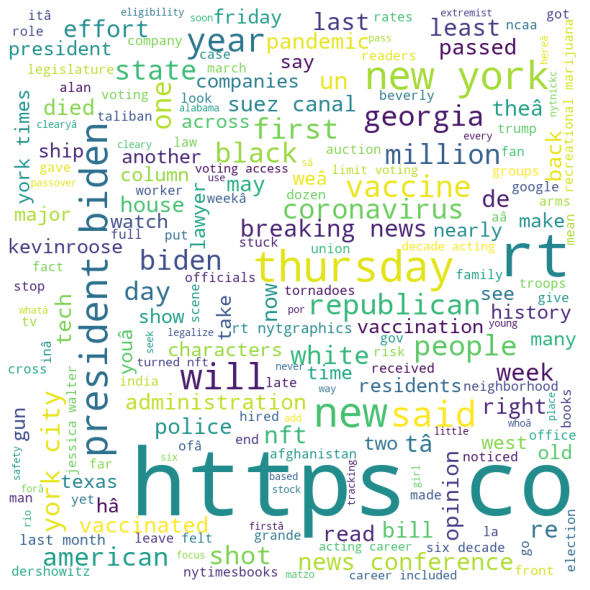

In [8]:

df = pd.read_csv(r"file.csv", encoding ="latin-1") 
  
comment_words = '' 
stopwords = set(STOPWORDS) 
 
for val in df.Tweets: 
 
    val = str(val) 

    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [9]:

WOE_ID = 23424975
auth= tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN,ACCESS_SECRET)
    # return api with authentication
api= tweepy.API(auth)
trends = api.trends_place(WOE_ID)
trends = json.loads(json.dumps(trends, indent=1))
trending = []
for trend in trends[0]["trends"]:
    trending.append(trend["name"])
trending
data1= pd.DataFrame(trending,columns= ['Trends'])
data1.to_csv('file1.csv')
print([s.strip('') for s in trending]) 
print([s.replace('', '') for s in trending])

['#FRAvSCO', '#SmackDown', '#SixNations', 'Jake Paul', '#TheCircle', '#NS10v10', 'Scotland', 'Askren', 'Logan Paul', 'Jolene', 'Tally', 'Edge', 'Cesaro', 'Daniel Bryan', 'Alba', 'priti patel', 'Primark', 'Manrika', 'Eddie Howe', 'Dulin', 'Paris', 'Wayne Pivac', 'Hamish Watson', 'Leigh', 'Beverly Cleary', 'Ramona', 'Chris Harris', 'Home office', 'Masvidal', 'Fact Check', 'Jujutsu Kaisen', 'Satan', 'Syed', 'Wigan', 'Dave Cherry', 'twickenham', 'Barnes', 'Hogg', 'Russell', 'Hashu', 'felix', 'Lil Nas', 'john walker', 'Captain America', 'Bucky', 'King Shark', 'Gaelic', 'Sergio', 'Gorillaz', '49ers']
['#FRAvSCO', '#SmackDown', '#SixNations', 'Jake Paul', '#TheCircle', '#NS10v10', 'Scotland', 'Askren', 'Logan Paul', 'Jolene', 'Tally', 'Edge', 'Cesaro', 'Daniel Bryan', 'Alba', 'priti patel', 'Primark', 'Manrika', 'Eddie Howe', 'Dulin', 'Paris', 'Wayne Pivac', 'Hamish Watson', 'Leigh', 'Beverly Cleary', 'Ramona', 'Chris Harris', 'Home office', 'Masvidal', 'Fact Check', 'Jujutsu Kaisen', 'Satan'

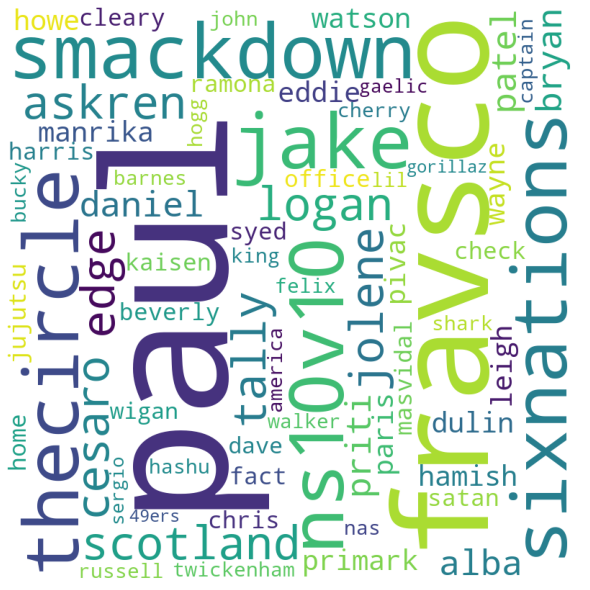

In [10]:
df1 = pd.read_csv(r"file1.csv", encoding ="latin-1") 
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df1.Trends: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

enter #topic name#coronavirus
{
 "created_at": "Sat Mar 27 02:54:48 +0000 2021",
 "id": 1375642431698444288,
 "id_str": "1375642431698444288",
 "text": "RT @SkyNews: Retailers will be able to stay open until 10pm six days a week when they welcome back customers following months of closures i\u2026",
 "truncated": false,
 "entities": {
  "hashtags": [],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "SkyNews",
    "name": "Sky News",
    "id": 7587032,
    "id_str": "7587032",
    "indices": [
     3,
     11
    ]
   }
  ],
  "urls": []
 },
 "metadata": {
  "iso_language_code": "en",
  "result_type": "recent"
 },
 "source": "<a href=\"http://twitter.com/download/android\" rel=\"nofollow\">Twitter for Android</a>",
 "in_reply_to_status_id": null,
 "in_reply_to_status_id_str": null,
 "in_reply_to_user_id": null,
 "in_reply_to_user_id_str": null,
 "in_reply_to_screen_name": null,
 "user": {
  "id": 1114653676646346752,
  "id_str": "1114653676646346752",
  "name": "Milly Wal

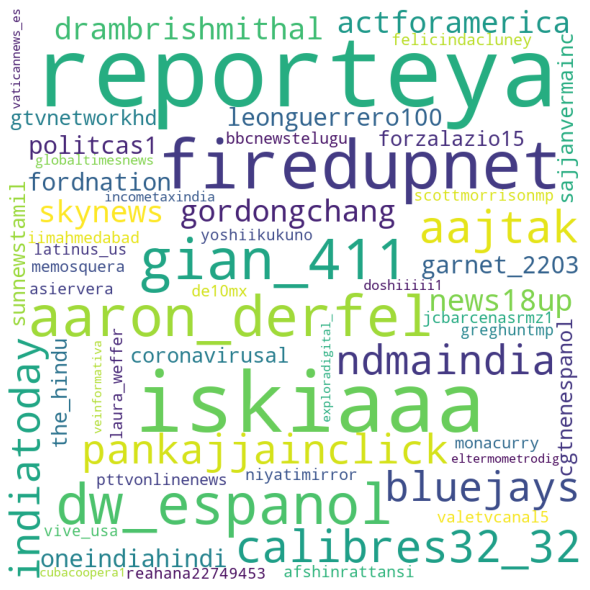

In [25]:
if not os.path.exists('secret_twitter_credentials.pk1'):
    Twitter = {}
    Twitter['Consumer Key'] = '2xd78q4oIIuQz2MrRx126cOq3'
    Twitter['Consumer Secret'] = 'Th2OuF7kXOsqGMvjSBDIfwIN59YXYJfd7oiuXmw9Zxsd2I8yN5'
    Twitter['Access Token'] = '462777940-0HfcULFaQtNfgZWfQbQC1UlgVLp6u2SR4GafWqzu'
    Twitter['Access Token Secret'] = '2OD0S1GS49q80YPStEcKa4ESCHmANQ2tZUBTGe9mcwYL7'
    with open('hashtags.csv','wb') as f:
        pickle.dump(Twitter,f)
else:
    Twitter = pickle.load(open('hashtags.csv','rb'))
auth = twitter.oauth.OAuth(Twitter['Access Token'],
                          Twitter['Access Token Secret'],
                          Twitter['Consumer Key'],
                          Twitter['Consumer Secret'])
twitter_api = twitter.Twitter(auth=auth)
print(twitter_api)
topic = input("enter #topic name")
number = 1000
search_results = twitter_api.search.tweets(q=topic,count=number)
statuses = search_results['statuses'] 
len(statuses)   
all_text =[]
filtered_statuses=[]
for s in statuses:
    if not s['text'] in all_text:
        filtered_statuses.append(s)
        all_text.append(s["text"])
statuses= filtered_statuses
len(statuses)
print(json.dumps(statuses[0], indent=1))
t = statuses[0]
print(t['retweet_count'])
print(t['retweeted'])
status_texts = [status['text']
               for status in statuses]
screen_names = [user_mention['screen_name']
               for status in statuses
                   for user_mention in status['entities']['user_mentions']]
hashtags = [hashtag['text']
               for status in statuses
                   for hashtag in status['entities']['hashtags']]

#compute the collection of the words from all tweets
words = [w
        for t in status_texts

         for w in t.split()]
print(json.dumps(status_texts[:5],indent=1))
print(json.dumps(screen_names[:5],indent=1))
print(json.dumps(hashtags[:5],indent=1))
print(json.dumps(words[:5],indent=1))

for item in [words,screen_names,hashtags]:
    c=Counter(item)
    print(c.most_common()[:100]) 
    print() 

def prettyprint_counts(label,list_of_tuples):
    print("\n{:^20} | {:^6}".format(label,"Count"))
    print("*"*40)
    for k,v in list_of_tuples:
        print("{:20} | {:>6}".format(k,v))   
for label, data3 in (('word',words),
                   ('Screen Name',screen_names),
                   ('Hashtag',hashtags)):
    c = Counter(data3)
    prettyprint_counts(label,c.most_common()[:10])  

retweets = [
            (status['retweet_count'],
             status['retweeted_status']['user']['screen_name'],
             status['text'].replace("\n","\\"))
    
             for status in statuses
                if 'retweeted_status' in status
          ]  
row_template = "{:^7} | {:^15} | {:50}"
def prettyprint_tweets(list_of_tuples):
    print()
    print(row_template.format("Likes","Screen Name","Text"))
    print("*"*30)
    for count,screen_names,text in list_of_tuples:
        print(row_template.format(count,screen_names,text[:50]))

        if len(text)>50:
            print(row_template.format("","",text[50:100]))
            if len(text)>100:
                print(row_template.format("","",text[100:])) 

prettyprint_tweets(sorted(retweets, reverse=True)[:100])
data8= pd.DataFrame(screen_names,columns= ['screen_names'])
data8.to_csv('screen_names.csv')
df6 = pd.read_csv(r"screen_names.csv", encoding ="latin-1") 
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df6.screen_names: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'extended_entities',
       'quoted_status_id', 'quoted_status_id_str'],
      dtype='object')
0        0
1      112
2       51
3       24
4       42
5      663
6        0
7       55
8       97
9      106
10       0
11     261
12    1961
13    2051
14     142
15      91
16       0
17     544
18     365
19     198
20      16
21       0
22      39
23      22
24       0
Name: favorite_count, dtype: int64


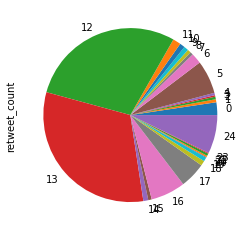

Number of tweets: 25
Total number of likes: 6840
Total number of retweets: 2500


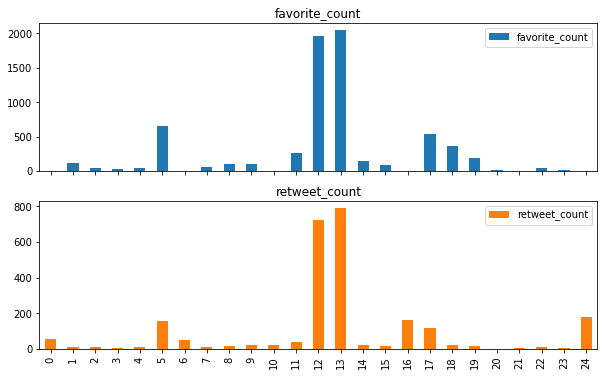

Data for CNN
Number of tweets: 10
Number of likes: 4782
Number of likes per tweet: 478.2
Number of retweets: 1421
Number of retweets per tweet: 142.1


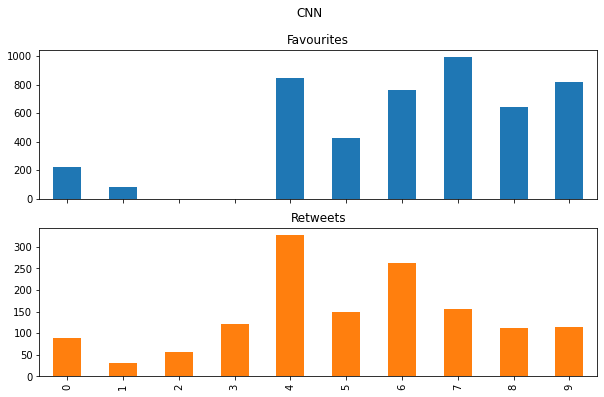

Data for BBCWorld
Number of tweets: 10
Number of likes: 3466
Number of likes per tweet: 346.6
Number of retweets: 934
Number of retweets per tweet: 93.4


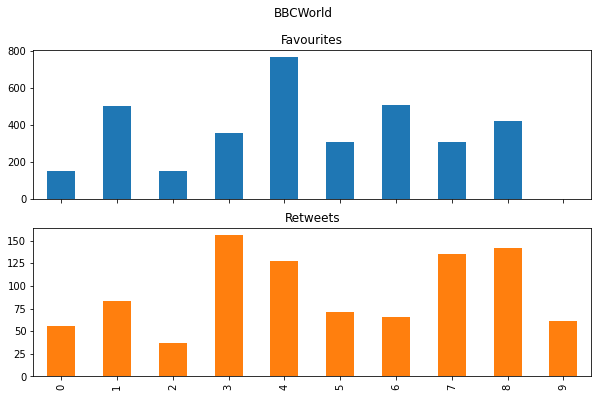

In [12]:
CONSUMER_KEY= '2xd78q4oIIuQz2MrRx126cOq3'
CONSUMER_SECRET= 'Th2OuF7kXOsqGMvjSBDIfwIN59YXYJfd7oiuXmw9Zxsd2I8yN5'
ACCESS_SECRET= '2OD0S1GS49q80YPStEcKa4ESCHmANQ2tZUBTGe9mcwYL7'
ACCESS_TOKEN='462777940-0HfcULFaQtNfgZWfQbQC1UlgVLp6u2SR4GafWqzu'
auth = twitter.oauth.OAuth(ACCESS_TOKEN, ACCESS_SECRET, CONSUMER_KEY,CONSUMER_SECRET)
twitter_api = twitter.Twitter(auth=auth)
tweets = twitter_api.search.tweets(q="BBC", count=100)
tweets = twitter_api.search.tweets(q="from:BBC", count=100)
tweetData = pd.DataFrame(tweets['statuses'])
print(tweetData.columns)
print(tweetData['favorite_count'])
tweetData['retweet_count'].plot.pie()
plt.show()
# Get the data
tweet_count = len(tweetData)
favorite_count = tweetData['favorite_count'].sum()
retweet_count = tweetData['retweet_count'].sum()


# Print it out
print('Number of tweets: ' + str(tweet_count))
print('Total number of likes: ' + str(favorite_count))
print('Total number of retweets: ' + str(retweet_count))

# Draw a nice plot of the likes and retweets
tweetData.plot.bar(subplots=True, figsize=(10,6),y=['favorite_count','retweet_count'])
plt.show()
names = ['CNN','BBCWorld']
for name in names:
  tweets = pd.DataFrame(twitter_api.search.tweets(q="from:"+name,        count=10)['statuses'])
  tweet_count = len(tweets)
  favorite_count = tweets['favorite_count'].sum()
  retweet_count = tweets['retweet_count'].sum()

  print("Data for "+name)
  print('Number of tweets: ' + str(tweet_count))
  print('Number of likes: ' + str(favorite_count))
  print('Number of likes per tweet: '+str(favorite_count/tweet_count))
  print('Number of retweets: ' + str(retweet_count))
  print('Number of retweets per tweet: '+str(retweet_count/tweet_count))

  tweets.plot.bar(subplots=True, figsize=(10,6),y=
    ['favorite_count','retweet_count'],
    legend=False,label=['Favourites','Retweets'],title=name)

  plt.show()



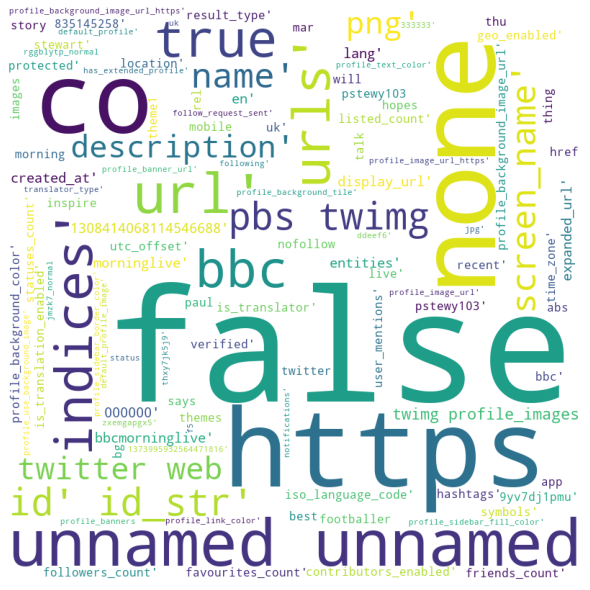

In [13]:


df4 = pd.DataFrame(data = tweetData)
df4.to_csv('file4.csv', index=False, header=None)
df4 = pd.read_csv(r"file4.csv", encoding ="latin-1") 
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df4: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [14]:
print(data4)

                                                Tweets
0    In Opinion\n\nA look into uneven vaccine rollo...
1    RT @reidepstein: NEW w/@NYTnickc: Georgia esca...
2    Dozens of tornadoes tore across Alabama and Ge...
3    Some activists pushing for statehood for Washi...
4    Nuevos videos obtenidos por The New York Times...
..                                                 ...
195  An NFT that sold for nearly $700,000 was the l...
196  New York reaches a deal to legalize recreation...
197  President Biden will hold the first formal new...
198  “If you’re not alive, you’re never going to se...
199  RT @nytimesbusiness: Watch live: Mark Zuckerbe...

[200 rows x 1 columns]


In [15]:
data4['length']= np.array([len(tweet.text) for tweet in tweets1])
data4['ID']= np.array([tweet.id for tweet in tweets1])
data4['Date']= np.array([tweet.created_at for tweet in tweets1])
data4['Sources']= np.array([tweet.source for tweet in tweets1])
data4['Likes']= np.array([tweet.favorite_count for tweet in tweets1])
data4['Rts']= np.array([tweet.retweet_count for tweet in tweets1])

In [16]:
mean= np.mean(data4['length'])
fmax= np.max(data4['Likes'])
rts= np.max(data4['Rts'])
print(mean)
print(fmax) # Most Liked
print(rts) # retweeted

136.86
3791
972


In [17]:
fav_tweet= data4[data4.Likes== fmax]
print(fav_tweet['Tweets'])
print(fmax)

19    Beverly Cleary, the author who captivated tens...
Name: Tweets, dtype: object
3791


In [18]:
sources= []
for i in data4['Sources']:
    if i not in sources:
        sources.append(i)

print("Print the List of All the sources:")
for i in sources:
    print('* {}'.format(i))

Print the List of All the sources:
* SocialFlow
* Twitter Web App
* TweetDeck


In [19]:
from textblob import TextBlob
import re

In [20]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())


In [21]:
def analyse_sentiment(tweet):
    analysis= TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity>0:
        return 1
    elif analysis.sentiment.polarity==0:
        return 0
    else:
        return -1

In [22]:
data4['Sentiment']= np.array([analyse_sentiment(tweet) for tweet in data4['Tweets']])
display(data4.head(10))

,Tweets,length,ID,Date,Sources,Likes,Rts,Sentiment
0,In Opinion\n\nA look into uneven vaccine rollo...,139,1375638721622577153,2021-03-27 02:40:04,SocialFlow,50,17,-1
1,RT @reidepstein: NEW w/@NYTnickc: Georgia esca...,140,1375633441732104201,2021-03-27 02:19:05,SocialFlow,0,36,1
2,Dozens of tornadoes tore across Alabama and Ge...,140,1375628679301193734,2021-03-27 02:00:09,SocialFlow,81,29,-1
3,Some activists pushing for statehood for Washi...,140,1375623616642101248,2021-03-27 01:40:02,SocialFlow,257,48,1
4,Nuevos videos obtenidos por The New York Times...,139,1375621126068527104,2021-03-27 01:30:08,SocialFlow,60,25,1
5,"RT @mirjordan: A little girl, just 9, died att...",140,1375618581971501058,2021-03-27 01:20:02,SocialFlow,0,82,-1
6,A bill to legalize recreational marijuana in N...,140,1375613593358639105,2021-03-27 01:00:12,SocialFlow,316,57,1
7,A Yale psychiatrist said she was let go after ...,140,1375608523447529477,2021-03-27 00:40:04,SocialFlow,364,106,1
8,RT @nytgraphics: We’re tracking vaccine eligib...,140,1375603499417927685,2021-03-27 00:20:06,SocialFlow,0,14,0
9,"""To read Cleary’s books as a child in the 1980...",134,1375598486410948609,2021-03-27 00:00:11,SocialFlow,472,63,0


In [23]:
ps=0
ns=0
nn=0
for sa in data4['Sentiment']:
    if sa>0.0:
        ps+=1
    elif sa<0.0:
        ns+=1
    else:
        nn+=1

In [24]:
print("Percentage of positive sentiment : {}%".format(ps*100/len(data4['Tweets'])))
print("Percentage of Negative Sentiment : {}%".format(ns*100/len(data4['Tweets'])))
print("Percentage of Neutral sentiment : {}%".format(nn*100/len(data4['Tweets'])))


Percentage of positive sentiment : 49.5%
Percentage of Negative Sentiment : 19.0%
Percentage of Neutral sentiment : 31.5%
